<a href="https://colab.research.google.com/github/kumarirakhi19/Diabetes-Prediction/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Important Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Create Directory path
test_analysis = pd.read_csv("/content/drive/MyDrive/Disease prediction /diabetes_v2/diabetes_test_analysis.csv")
train_analysis = pd.read_csv("/content/drive/MyDrive/Disease prediction /diabetes_v2/diabetes_train_analysis.csv")
test_info = pd.read_csv("/content/drive/MyDrive/Disease prediction /diabetes_v2/diabetes_test_info.csv")
train_info = pd.read_csv("/content/drive/MyDrive/Disease prediction /diabetes_v2/diabetes_train_info.csv")

In [ ]:
#Find no of rows and columns
train_analysis.shape

(60000, 8)

In [ ]:
train_info.shape

(60000, 5)

In [ ]:
train_info.head()

,id,age,height,weight,gender
0,0,50,168,62.0,f
1,1,55,156,85.0,m
2,2,18857,165,64.0,male
3,3,17623,169,82.0,f
4,4,47,156,56.0,m


In [ ]:
train_analysis.head()

,id,cholesterol,gluc,smoke,alco,active,pressure,diabetes
0,62538,low,low,0,0,1,100/80,0
1,49159,low,low,0,0,1,120/82,0
2,60683,low,low,0,0,1,120/80,0
3,42924,low,low,0,0,0,120\80,0
4,52888,low,low,0,0,0,120/80,0


In [ ]:
# Merge both csv file
df = train_analysis.merge(train_info,on = "id").drop(columns = "id")

# Outlier check

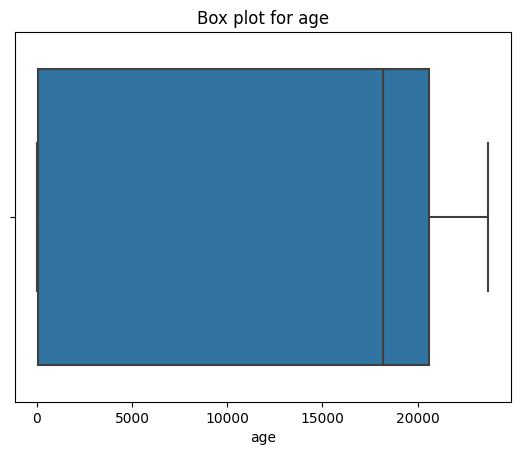

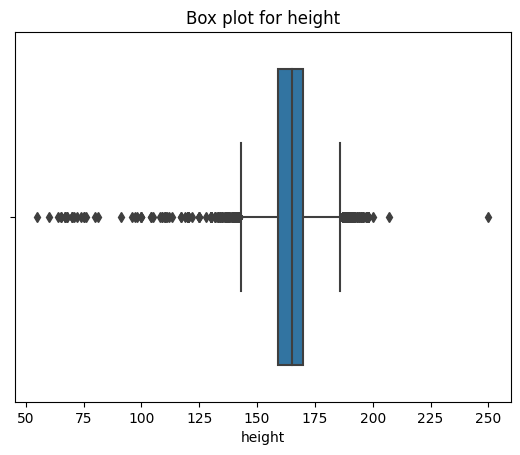

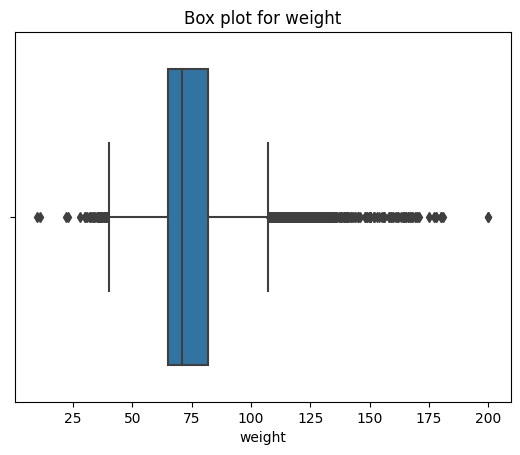

In [ ]:
num_cols = ['age', 'height', 'weight']

# Plot box plots for each numerical column
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.xlabel(col)
    plt.title('Box plot for ' + col)
    plt.show()

Outliers are present in all column. age ,height(140 beyond and 185 beyond),weight(40 to --,110 to ---)

In [ ]:
def outlier_treat(dataframe,column):
  dataframe[column] = dataframe[column].astype(float)
  q1 = dataframe[column].quantile(0.25)
  q3 = dataframe[column].quantile(0.75)

  # calculate the interquartile range (IQR)
  iqr = q3 - q1

  # define the lower and upper bounds for outliers
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  # drop rows containing outliers
  dataframe = dataframe.drop(dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)].index)
  return dataframe

outliers are removed by quantile range

In [ ]:
df.head(1)

,cholesterol,gluc,smoke,alco,active,pressure,diabetes,age,height,weight,gender
0,low,low,0,0,1,100/80,0,54,169,76.0,f


**Cleaning Process**

In [ ]:
def clean_data(df1,df2):
  df = df1.merge(df2,on = "id").drop(columns = "id")
  df = df[df["age"]<=100].reset_index(drop=True)
  df["gender"] = df["gender"].apply(lambda x:"male" if x=="m" else("female" if x == "f" else x))
  df['high'] = [s.split('/')[0] if '/' in s else s.split('\\')[0] for s in df["pressure"]]
  df['low'] = [s.split('/')[1] if '/' in s else s.split('\\')[1] for s in df["pressure"]]
  df.drop(columns="pressure",inplace=True)
  df['high'] = df['high'].astype(int)
  df['low'] = df['low'].astype(int) 
  df['weight'].fillna(df['weight'].mean(), inplace=True)
  df.dropna(inplace = True)
  df["smoke"] = df["smoke"].apply(lambda x:"No" if x==0 else "Yes")
  df["alco"] = df["alco"].apply(lambda x:"No" if x==0 else "Yes")
  df["active"] = df["active"].apply(lambda x:"No" if x==0 else "Yes")
  for i in ['age', 'height', 'weight', 'high', 'low']:
    df = outlier_treat(df,i)
  return df

In [ ]:
train_df = clean_data(train_info,train_analysis)

**Exploratory Data Analysis**

**Univariate Analysis**

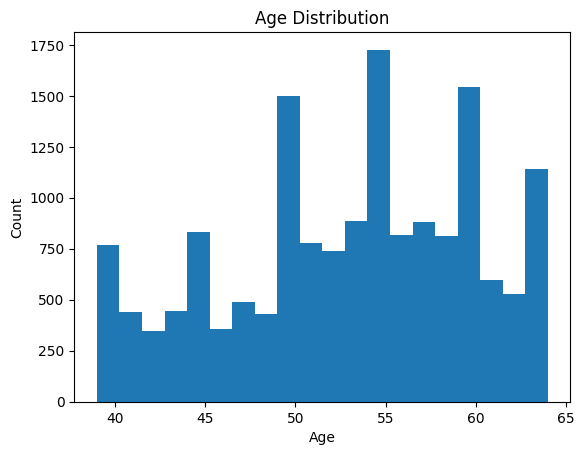

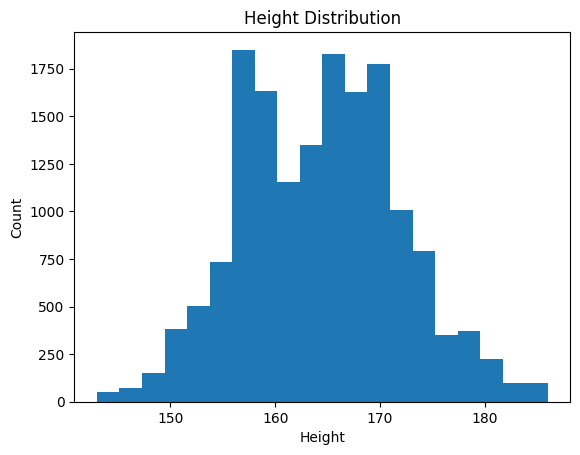

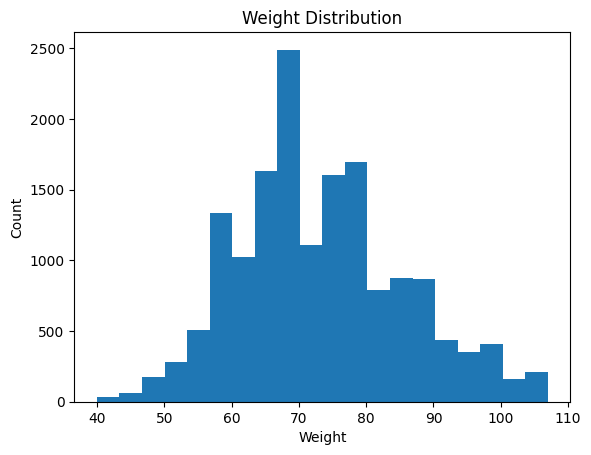

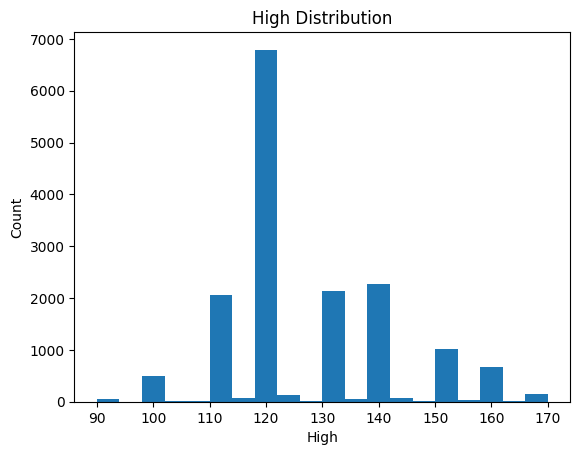

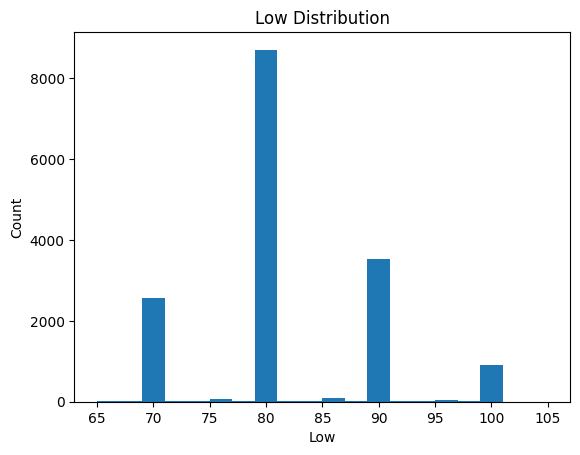

In [ ]:
#EDA
# Select numerical columns
num_cols = ['age', 'height', 'weight','high',"low"]

# Plot histograms for each numerical column
for col in num_cols:
    plt.hist(train_df[col], bins=20)
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.title(col.capitalize() + ' Distribution')
    plt.show()

**Conclusion**

1.Age is aprrox more between beyond 55

2.Height between 155 to 70.

3.Max weight at 70 ,till 70 weight is increases and after that it decreases.

4.maximum no of dataset is 80 to 120 .on low pressure max value at 70,80,90.on Maximum pressure at 110 to 140.






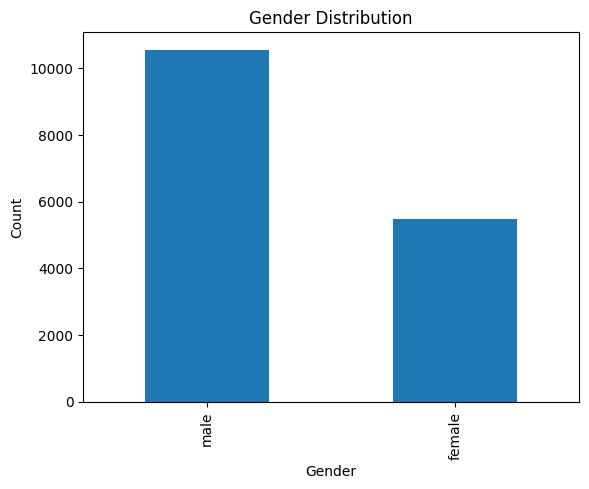

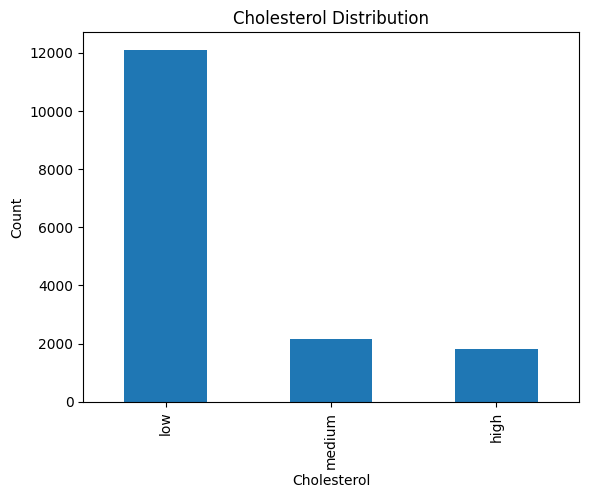

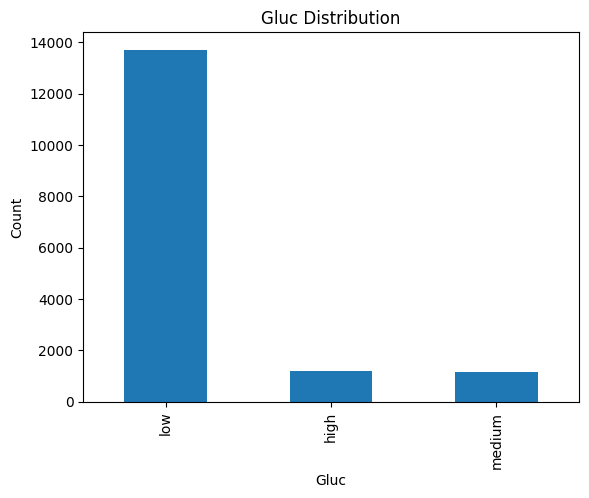

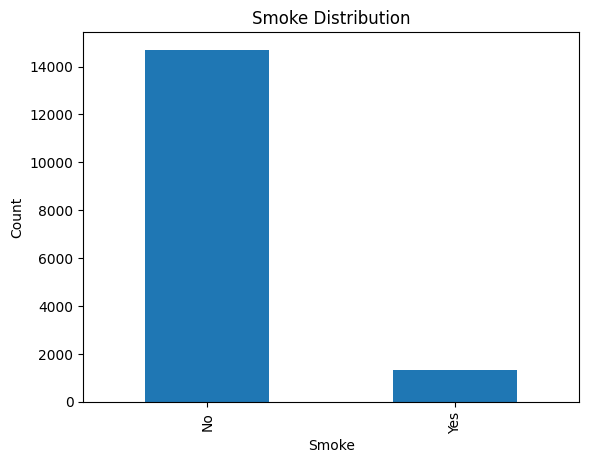

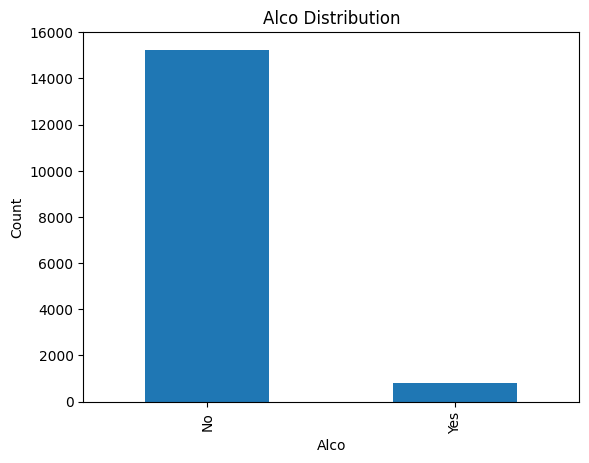

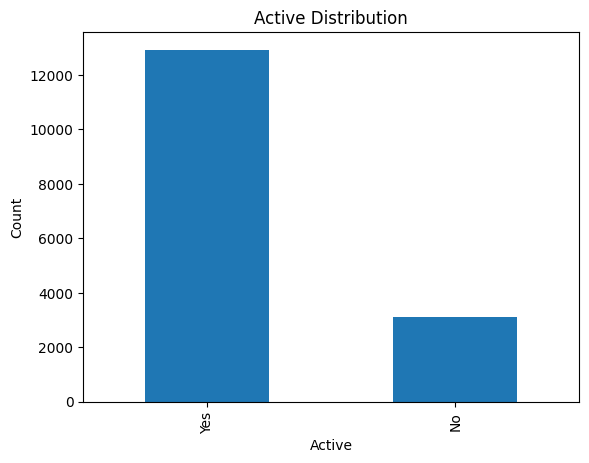

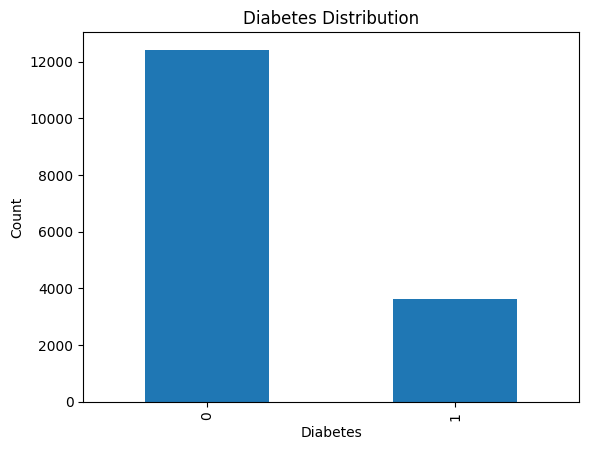

In [ ]:
cat_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'diabetes']

# Plot bar charts for each categorical column
for col in cat_cols:
    train_df[col].value_counts().plot(kind='bar')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.title(col.capitalize() + ' Distribution')
    plt.show()

**Conclusion**

On Categorical Variable max data set for low glucose,cholesterol,non alcoholic,non active , more Female dataset.

Graph shows that more dataset for non diabetic patient is more as compare to diabetic patient . means this dataset is imbalanced.

**Bivariate Analysis**

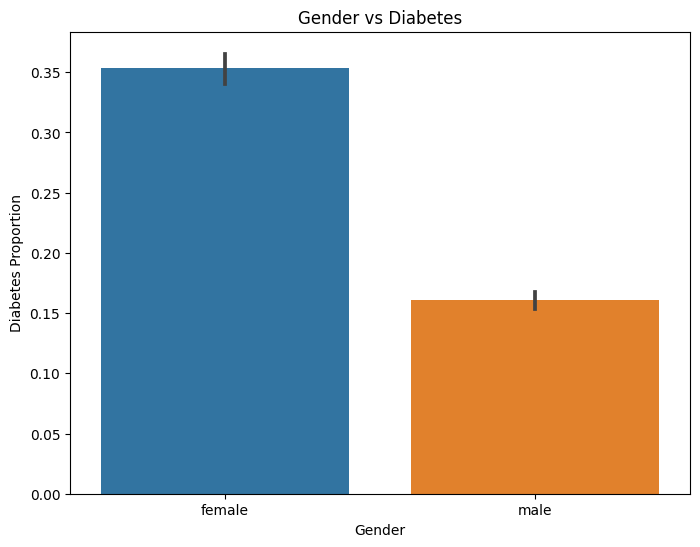

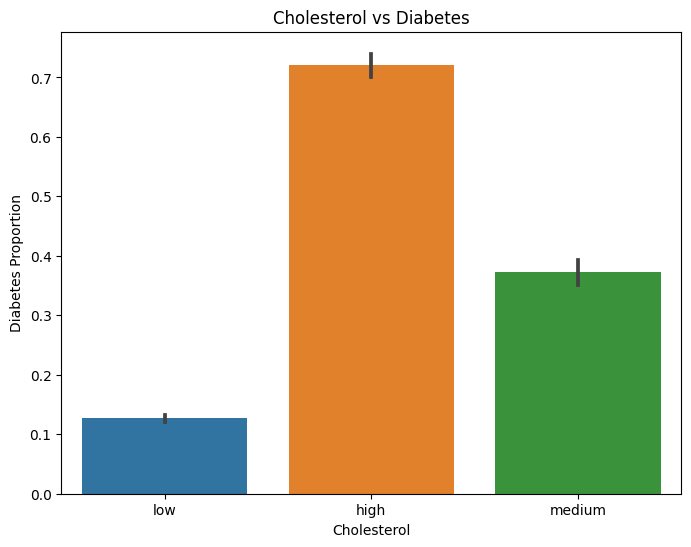

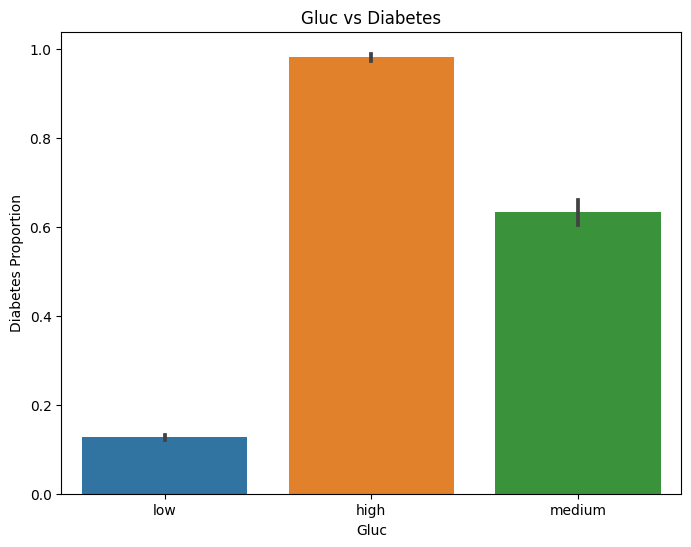

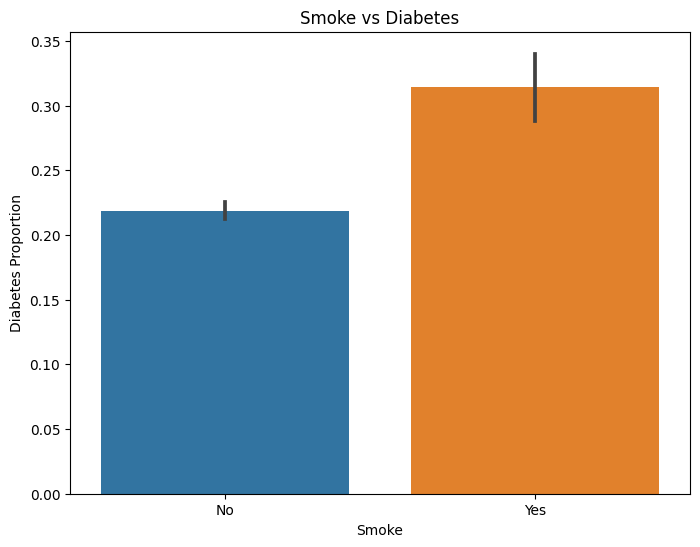

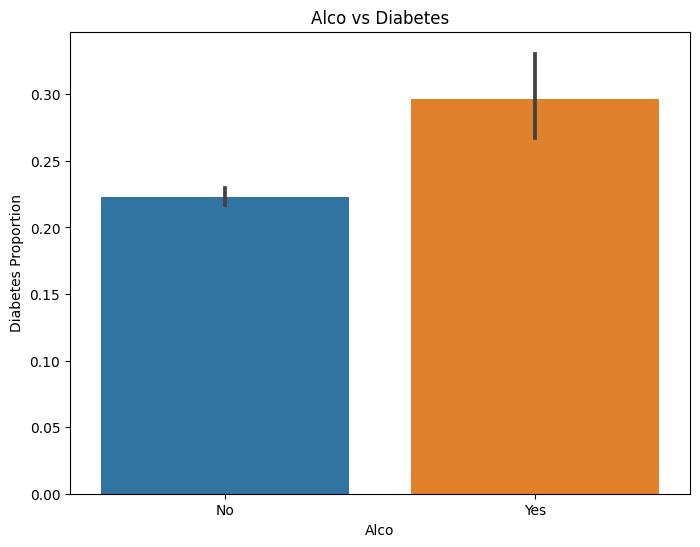

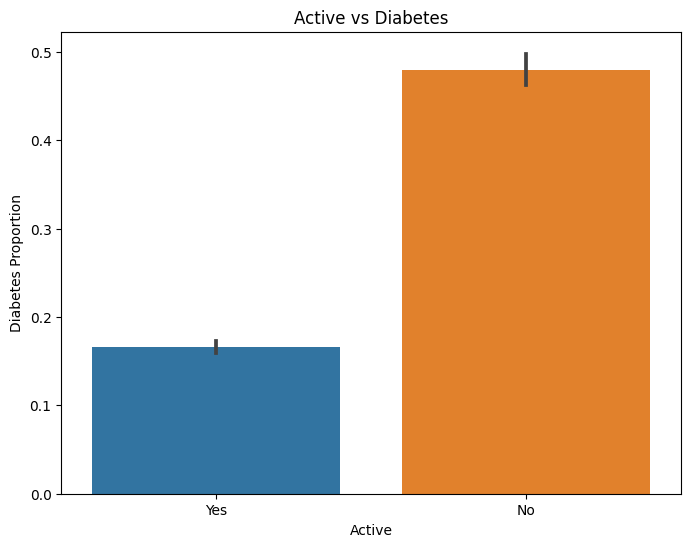

In [ ]:
# Select columns to plot
cols_to_plot = ['age', 'height', 'weight', 'gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'high','low']

# Plot bar charts for categorical columns
for col in cols_to_plot:
    if train_df[col].dtype == 'O':
        plt.figure(figsize=(8,6))
        sns.barplot(x=col, y='diabetes', data=train_df)
        plt.xlabel(col.capitalize())
        plt.ylabel('Diabetes Proportion')
        plt.title(col.capitalize() + ' vs Diabetes')
        plt.show()


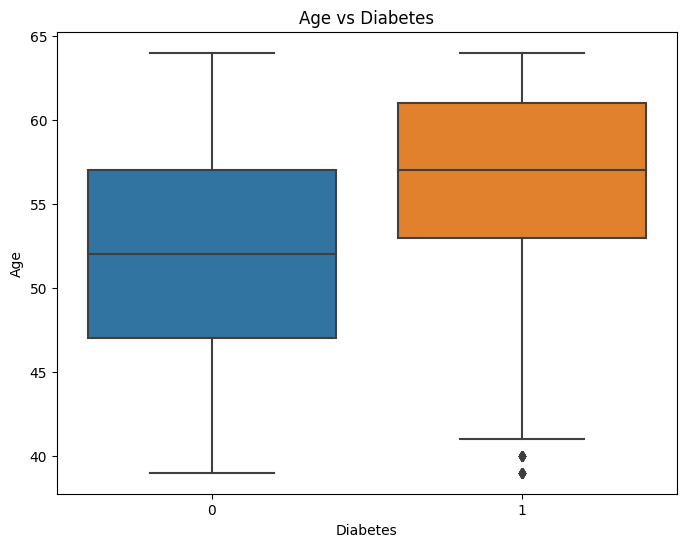

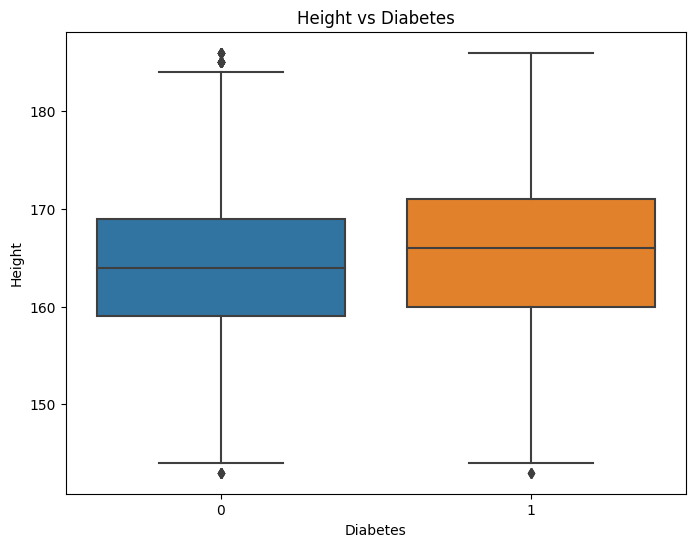

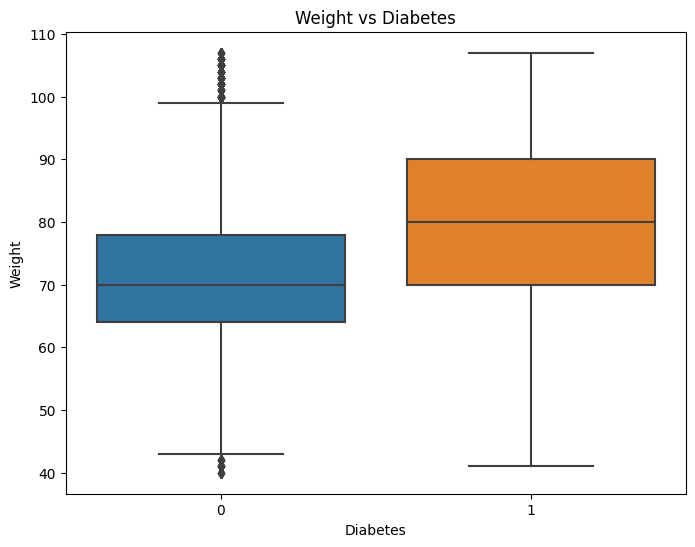

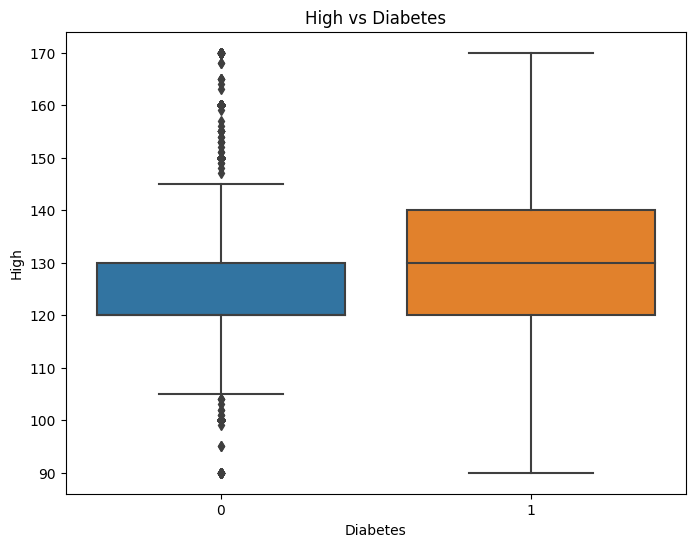

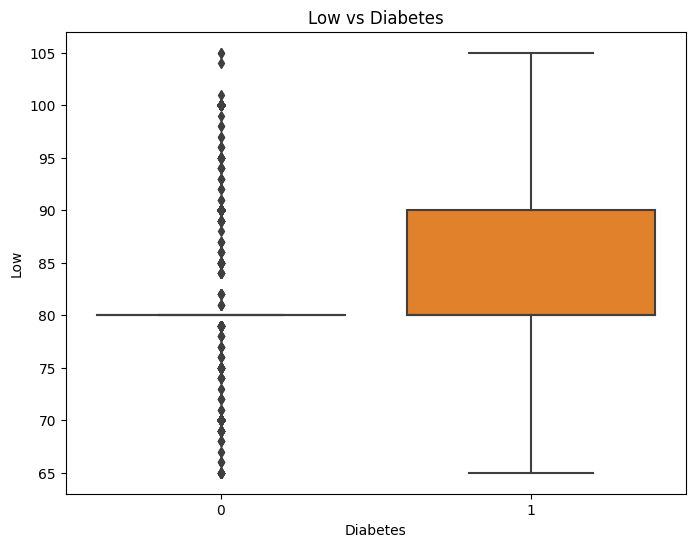

In [ ]:
# Plot box plots for numerical columns
for col in cols_to_plot:
    if train_df[col].dtype != 'O':
        plt.figure(figsize=(8,6))
        sns.boxplot(x='diabetes', y=col, data=train_df)
        plt.xlabel('Diabetes')
        plt.ylabel(col.capitalize())
        plt.title(col.capitalize() + ' vs Diabetes')
        plt.show()

**Result**

1. Chance of diabetes is more in female.
2. High level cholesterol chance of diabetes is more.
3. Level of glucose increases diabetes chance is increases.
4. smoker have more chance of diabetes.
5. Alcoholic person has more chance of diabetes.
6. Active person has less chance of Diabetes.
7. At low pressure has less chance of Diabetes,but high pressure has high chance of diabetes.
f




for numeric dataset

1.Age ,weight,high pressure increses diabetes increases. height and low blood pressure do not impact on these diseases.


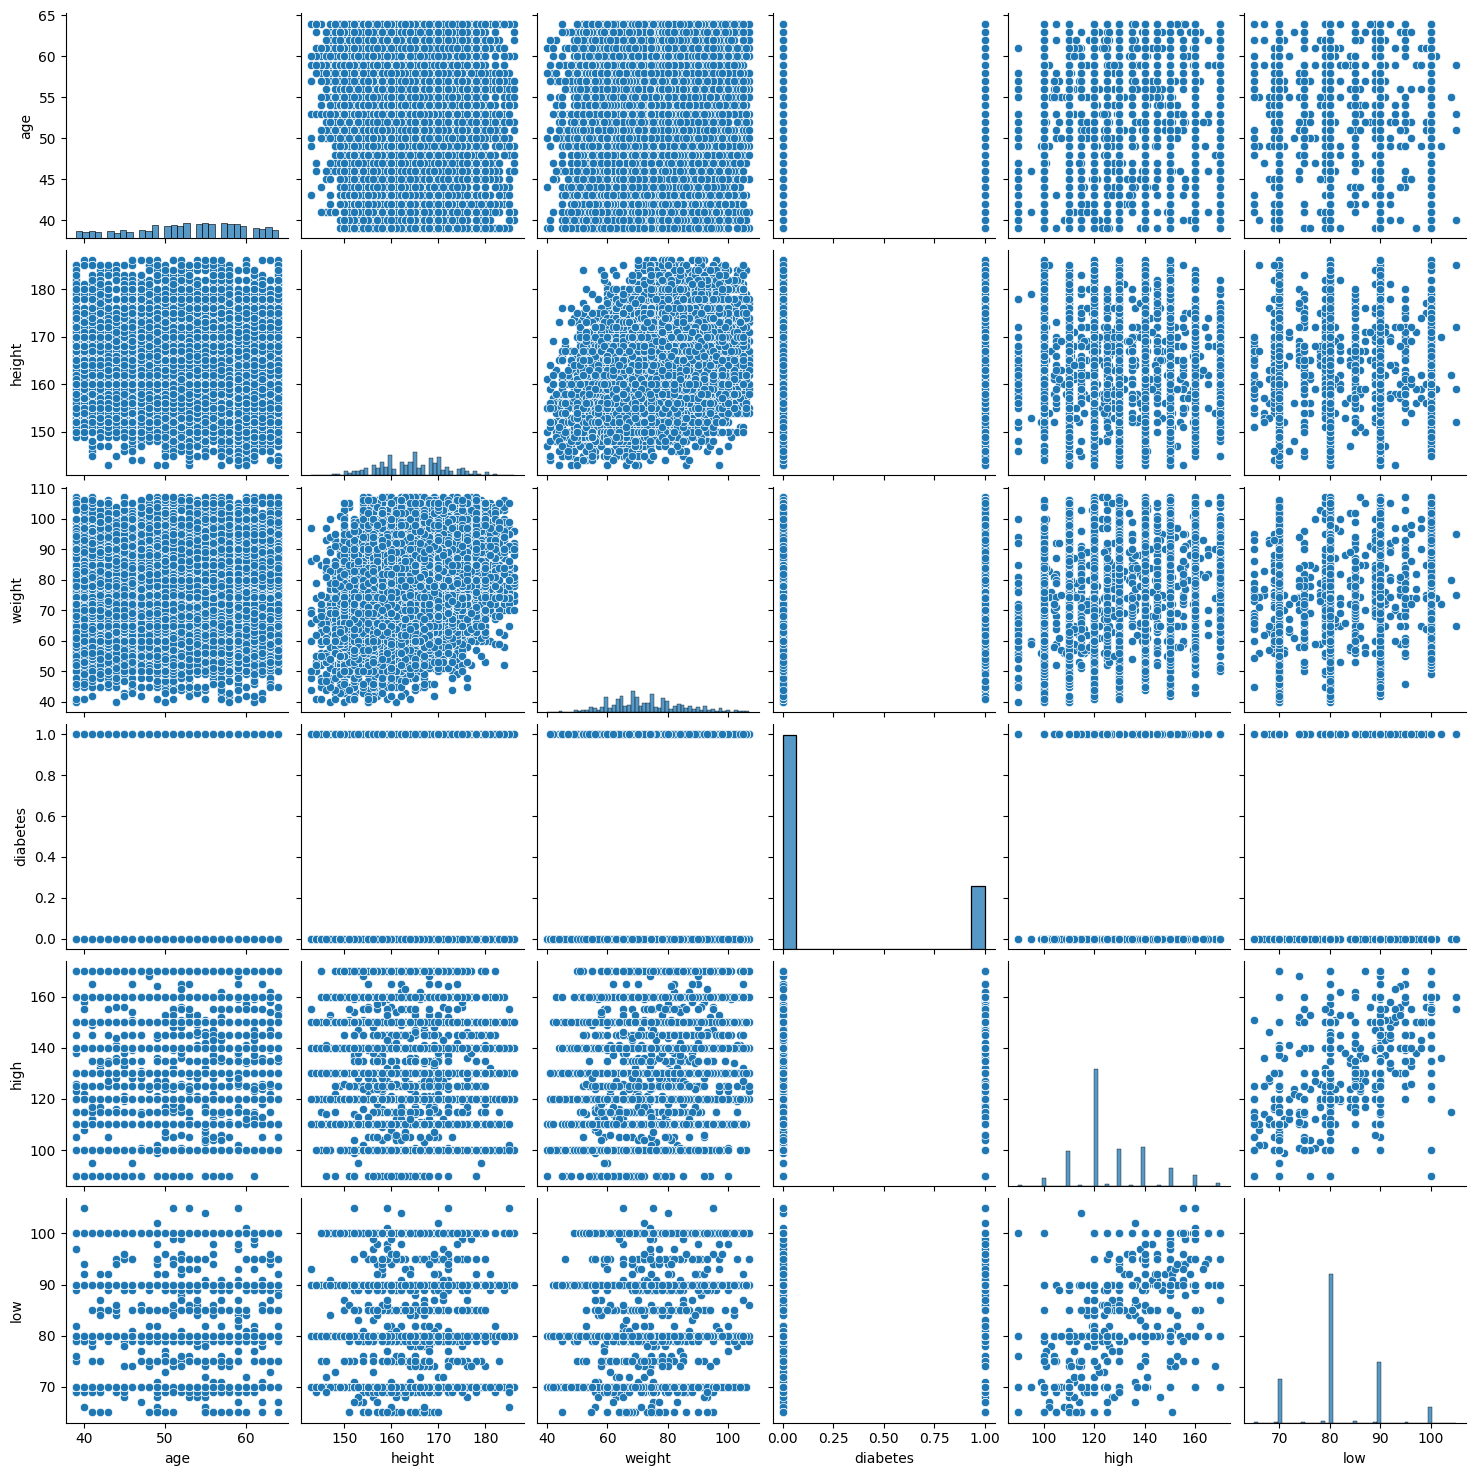

In [ ]:
sns.pairplot(train_df)
plt.show()

***Result***

*when we graph between variable i found only relationship between height and weight .height increases weight increases.*

<ipython-input-23-0e8c1396fdae>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_df.corr()


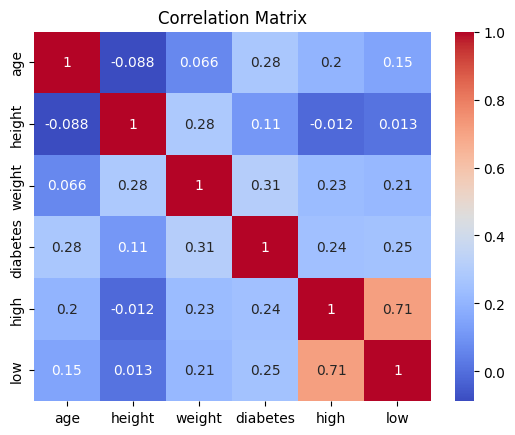

In [ ]:
corr = train_df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
train = pd.get_dummies(train_df)

In [ ]:
test_df = clean_data(test_info,test_analysis)
test = pd.get_dummies(test_df)

In [ ]:
X_train = train.drop(columns = "diabetes")
y_train = train["diabetes"]
X_test = test.drop(columns = "diabetes")
y_test = test["diabetes"]

**Model Implementation**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
# Import Gridsearch cv & Randomsearch cv for hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Import evalution matrices
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report,roc_auc_score,roc_curve, auc

In [ ]:
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
scaler = StandardScaler()

# fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Creating empty list for storing metrices scores
train_accuracy_sco = []
test_accuracy_sco  = [] 
train_precision_sco = []
test_precision_sco =[]
train_recall_sco  = []
test_recall_sco  = []
train_f1_sco = []
test_f1_sco = []
train_roc_sco =[]
test_roc_sco =[]

In [ ]:
# Defining the function (without Cv and Hyperparameter tuning)
def matrix_without_hp(x_train,x_test,y_train,y_true):
  Log = LogisticRegression()
  SGD = SGDClassifier()
  svc = SVC()
  KNN = KNeighborsClassifier()
  DSTree = DecisionTreeClassifier()
  RFC = RandomForestClassifier()
  GBC = GradientBoostingClassifier()
  XGBC = XGBClassifier(silent=True)

  models = [Log, SGD, svc, KNN, DSTree, RFC, GBC, XGBC]

  for i in models:
    i.fit(x_train,y_train)
    train_pred = i.predict(x_train)
    test_pred = i.predict(x_test)

    # accuracy score
    train_accuracy = accuracy_score(y_train,train_pred)
    test_accuracy = accuracy_score(y_true,test_pred)
    
    # Precision score
    train_precision = precision_score(y_train,train_pred)
    test_precision = precision_score(y_true,test_pred)
    
    #recall Score
    train_recall = recall_score(y_train,train_pred)
    test_recall = recall_score(y_true,test_pred)
    
    # F1 score
    train_f1 = f1_score(y_train,train_pred)
    test_f1 = f1_score(y_true,test_pred)
    
    # ROC_AUC Score
    train_roc = roc_auc_score(y_train,train_pred)
    test_roc = roc_auc_score(y_true,test_pred)
    

    train_accuracy_sco.append(train_accuracy)
    test_accuracy_sco.append(test_accuracy)
    train_precision_sco.append(train_precision)
    test_precision_sco.append(test_precision)
    train_recall_sco.append(train_recall)
    test_recall_sco.append(test_recall)
    train_f1_sco.append(train_f1)
    test_f1_sco.append(test_f1)
    train_roc_sco.append(train_roc)
    test_roc_sco.append(test_roc)
  

  
  scores = pd.DataFrame(list(zip(train_accuracy_sco,test_accuracy_sco,train_precision_sco,test_precision_sco,
                                 train_recall_sco,test_recall_sco,train_f1_sco,test_f1_sco,train_roc_sco,test_roc_sco )),
                        index=['Logistic Regression', 'Stochastic Gradient Descent', 'Support Vector Classifier', 'K Nearest Neighbor', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Extreme Gradient Boosting'],
                        columns=['Train accuracy score','Test accuracy score','Train precision score','Test precision score',
                                 'Train recall score','Test recall score','Train f1 score','Test f1 score','Train roc score','Test roc score'])
  return scores
  

In [ ]:
#Creating empty list for storing metrices scores
train_accuracy_score = []
test_accuracy_score  = [] 
train_precision_score = []
test_precision_score =[]
train_recall_score  = []
test_recall_score  = []
train_f1_score = []
test_f1_score = []
train_roc_score =[]
test_roc_score =[]

In [ ]:
#
def matrix(model,x_train,x_test,y_train,y_true, logistic = False):
  # fitting model
  model.fit(x_train,y_train)
  print('\n')
  print('='*30, 'Training score','='*30)
  training = model.score(x_train,y_train)
  print('\n')
  print('Training score  = ', training)
 
  print('\n')

  # if we are using grid search sc or random search cv printing best parameters and best score
  print('='*20, 'Best Parameters and Best score','='*20)
  try:
    print('best parameters  =  ', model.best_params_)
    print('Best score  =  ', model.best_score_)
  except:
    pass

  # predicting x_train
  train_pred = model.predict(x_train) 
  # predicting x_test
  test_pred = model.predict(x_test)
  print('\n')

  # printing all metrices scores on training set and test set
  print('='*30, 'Metrices scores on Train and Test Set','='*30)
  train_accuracy = accuracy_score(y_train,train_pred)
  test_accuracy = accuracy_score(y_true,test_pred)
  print('Train Accuracy score = ',train_accuracy)
  print('Test Accuracy score = ',test_accuracy)
  train_precision = precision_score(y_train,train_pred)
  test_precision = precision_score(y_true,test_pred)
  print('Train Precision score = ', train_precision)
  print('Test Precision score = ', test_precision)
  train_recall = recall_score(y_train,train_pred)
  test_recall = recall_score(y_true,test_pred)
  print('Train Recall score = ',train_recall)
  print('Test Recall score = ',test_recall)
  train_f1 = f1_score(y_train,train_pred)
  test_f1 = f1_score(y_true,test_pred)
  print('Train F1 score = ',train_f1) 
  print('Test F1 score = ',test_f1) 
  train_roc = roc_auc_score(y_train,train_pred)
  test_roc = roc_auc_score(y_true,test_pred)
  print('Train ROC_AUC score = ',train_roc) 
  print('Test ROC_AUC score = ',test_roc) 
  print('\n')

  # Classification Report on test set
  print('='*30, 'Metrices scores on Train and Test Set','='*30)
  target_names = ['class 0', 'class 1']
  print(classification_report(y_true, test_pred, target_names=target_names))
  print('\n')
  # Classification Report on train set
  print('='*30, 'Classification Report on train set','='*30)
  target_names = ['class 0', 'class 1']
  print(classification_report(y_train, train_pred, target_names=target_names))
  print('\n')

  # Graph of cofusion matrix on test set
  print('='*30, 'Confusion Matrix on test set','='*30)
  cf_matrix = confusion_matrix(y_true,test_pred)
  plt.title('Heatmap of confusion matrix on test set')
  group_names = ['True Negative','False Positive','False Negative','True Positive']
  group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
  plt.show()
  print('\n')

  # Graph of cofusion matrix on train set
  print('='*30, 'Confusion Matrix on train set','='*30)
  cf_matrix = confusion_matrix(y_train,train_pred)
  plt.title('Heatmap of confusion matrix on train set')
  group_names = ['True Negative','False Positive','False Negative','True Positive']
  group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
  plt.show()
  print('\n')
  
  try:
  # logistc regression top 10 feature
    print('='*40, 'Top 10 Feature Importance','='*40)
    if logistic == True:
      top_10 = pd.DataFrame({'Features':X.columns, 'Importance':np.abs(model.best_estimator_.coef_).ravel() }).sort_values("Importance",ascending =False)[:10].reset_index(drop=True)
    # for other models top 10 features 
    else :
      top_10 = pd.DataFrame({'Features':X.columns, 'Importance':(model.best_estimator_.feature_importances_)}).sort_values("Importance",ascending =False)[:10].reset_index(drop=True)
    
    sns.set(rc={'figure.figsize':(15,10)})
    ax=sns.barplot(x=X.columns[:10],y=top_10['Importance'])
    plt.xticks(rotation=90)
    for index, row in top_10.iterrows():
      ax.text(row.name,row.Importance, round(row.Importance,4), color='red', ha="center")
    plt.show()
  except:
    pass

  #roc_auc Curve
  test_fpr, test_tpr, test_threshold = roc_curve(y_true, test_pred)
  train_fpr, train_tpr, train_threshold = roc_curve(y_train, train_pred)
  test_roc_auc = auc(test_fpr, test_tpr)
  train_roc_auc = auc(train_fpr, train_tpr)

  # method I: plt
  plt.title('Receiver Operating Characteristic curves')
  plt.plot(test_fpr, test_tpr, 'b', label = 'Test AUC = %0.2f' % test_roc_auc,color='red')
  plt.plot(train_fpr, train_tpr, 'b', label = 'Train AUC = %0.2f' % train_roc_auc,color='blue')
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()



  
  train_accuracy_score.append(train_accuracy)
  test_accuracy_score.append(test_accuracy)
  train_precision_score.append(train_precision)
  test_precision_score.append(test_precision)
  train_recall_score.append(train_recall)
  test_recall_score.append(test_recall)
  train_f1_score.append(train_f1)
  test_f1_score.append(test_f1)
  train_roc_score.append(train_roc)
  test_roc_score.append(test_roc)

  
  
  return train_pred,test_pred



In [ ]:
scores = matrix_without_hp(X_train_scaled,X_test_scaled,y_train,y_test)

[19:11:20] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [ ]:
scores_without_hp=scores.sort_values("Test recall score",ascending=False).reset_index().rename(columns={'index':'model'})

In [ ]:
scores_without_hp

,model,Train accuracy score,Test accuracy score,Train precision score,Test precision score,Train recall score,Test recall score,Train f1 score,Test f1 score,Train roc score,Test roc score
0,Logistic Regression,0.997704,0.994307,0.996863,0.983278,0.998550,0.991568,0.997706,0.987406,0.997704,0.993336
1,Stochastic Gradient Descent,0.996696,0.993169,0.995578,0.979967,0.997825,0.989882,0.996700,0.984899,0.996696,0.992003
2,Support Vector Classifier,0.995609,0.989374,0.994931,0.974790,0.996294,0.978078,0.995612,0.976431,0.995609,0.985366
3,Extreme Gradient Boosting,0.999960,0.983681,0.999919,0.969283,1.000000,0.957841,0.999960,0.963528,0.999960,0.974513
4,Random Forest,1.000000,0.980645,1.000000,0.968858,1.000000,0.944351,1.000000,0.956447,1.000000,0.967768
5,Gradient Boosting,0.990613,0.979127,0.990732,0.967014,0.990492,0.939292,0.990612,0.952951,0.990613,0.964994
6,K Nearest Neighbor,0.988961,0.972296,0.987939,0.940678,0.990009,0.935919,0.988973,0.938292,0.988961,0.959389
7,Decision Tree,1.000000,0.970398,1.000000,0.932773,1.000000,0.935919,1.000000,0.934343,1.000000,0.958165


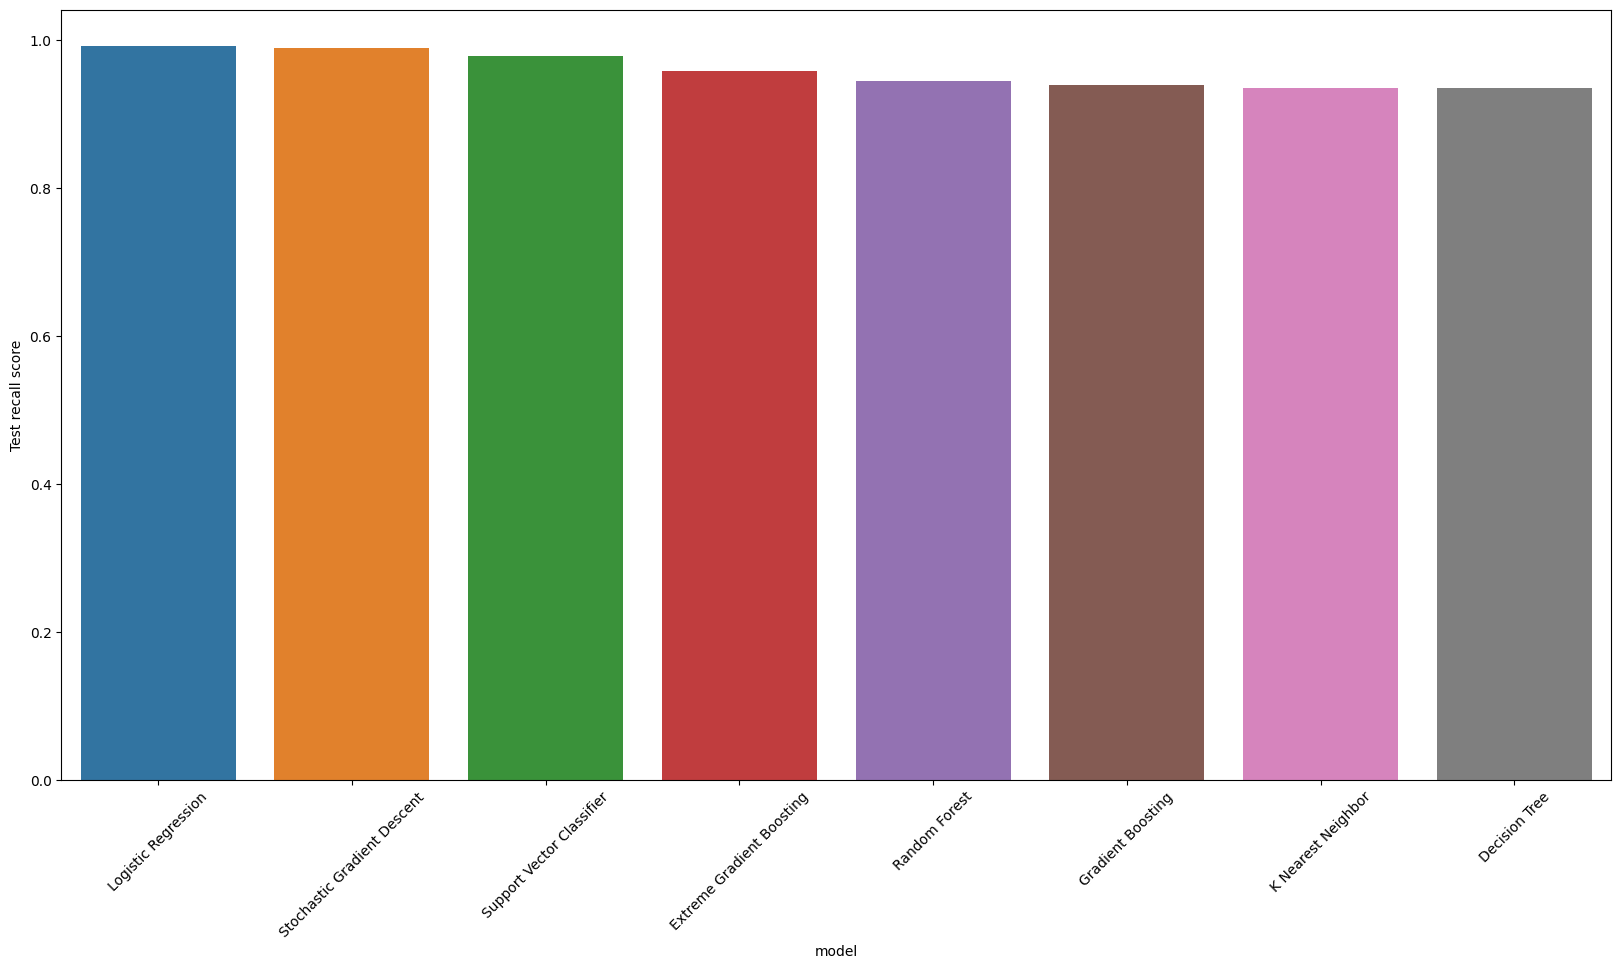

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x = scores_without_hp['model'],y = scores_without_hp['Test recall score'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Parameters for logistic regression
logistic_parameters = {'C': [10,0.001,0.01,0.1,1,10,100],
                       'penalty':['l2',"l1", 'l2', 'elasticnet','None'],
                       'class_weight':['balanced','dict',],
}

In [ ]:
# Using Grid Search for Hyperparameter Tuning
logistic_grid_search = GridSearchCV(LogisticRegression(),param_grid=logistic_parameters,cv=5,verbose=True,scoring='f1',n_jobs=-1)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
280 fits failed out of a total of 350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol



============================== Training score ==============================


Training score  =  0.9984292561118048


==================== Best Parameters and Best score ====================
best parameters  =   {'C': 100, 'class_weight': 'balanced', 'penalty': 'l2'}
Best score  =   0.997861301865022


============================== Metrices scores on Train and Test Set ==============================
Train Accuracy score =  0.9984288131496253
Test Accuracy score =  0.9946869070208728
Train Precision score =  0.9981478498953132
Test Precision score =  0.9881956155143339
Train Recall score =  0.9987108210458464
Test Recall score =  0.9881956155143339
Train F1 score =  0.9984292561118048
Test F1 score =  0.9881956155143339
Train ROC_AUC score =  0.9984288131496253
Test ROC_AUC score =  0.9923838018805754


============================== Metrices scores on Train and Test Set ==============================
              precision    recall  f1-score   support

     class 0       1.00    

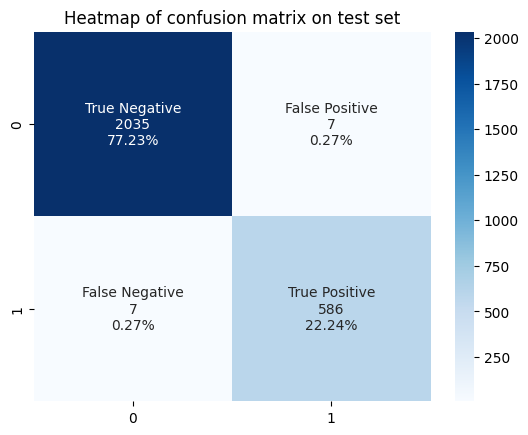



============================== Confusion Matrix on train set ==============================


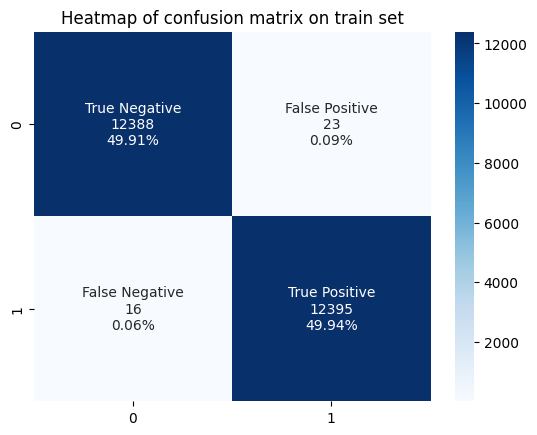



======================================== Top 10 Feature Importance ========================================


<ipython-input-33-795a7f5342af>:120: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(test_fpr, test_tpr, 'b', label = 'Test AUC = %0.2f' % test_roc_auc,color='red')
<ipython-input-33-795a7f5342af>:121: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(train_fpr, train_tpr, 'b', label = 'Train AUC = %0.2f' % train_roc_auc,color='blue')


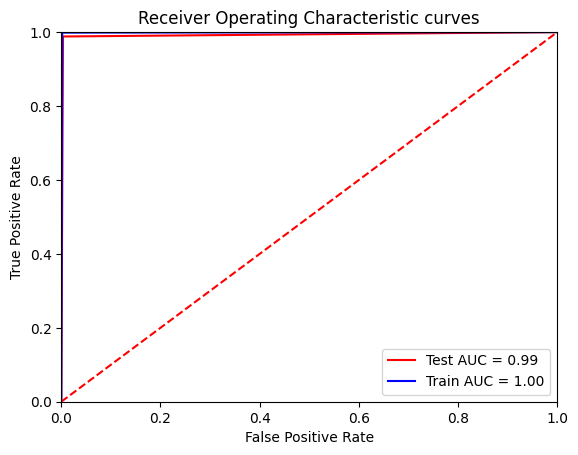

In [ ]:
# Fit and evalute model with the help of self define function
logistic_train_pred, logistic_test_pred = matrix(logistic_grid_search,X_train_scaled,X_test_scaled,y_train,y_test,logistic=True)

##Stochastic Gradient Descent

In [ ]:
# parameter for Stochastic Gradient Descent
sgd_params  = {'penalty':['l1','l2', 'elasticnet'],
               'alpha':[0.001,0.01,0.0001],
               'max_iter':[1500],
               
    
}


In [ ]:
# using grid search cv for hyperparameter tuning
sgd_grid = GridSearchCV(SGDClassifier(),param_grid=sgd_params,cv=5,n_jobs=-1,error_score='raise',scoring = "f1")



============================== Training score ==============================


Training score  =  0.9982671771106186


==================== Best Parameters and Best score ====================
best parameters  =   {'alpha': 0.0001, 'max_iter': 1500, 'penalty': 'l1'}
Best score  =   0.9977398728317027


============================== Metrices scores on Train and Test Set ==============================
Train Accuracy score =  0.9982676657803561
Test Accuracy score =  0.9946869070208728
Train Precision score =  0.9985488552079974
Test Precision score =  0.9898477157360406
Train Recall score =  0.9979856578841351
Test Recall score =  0.9865092748735245
Train F1 score =  0.9982671771106186
Test F1 score =  0.9881756756756758
Train ROC_AUC score =  0.9982676657803561
Test ROC_AUC score =  0.9917854895425409


============================== Metrices scores on Train and Test Set ==============================
              precision    recall  f1-score   support

     class 0       1.00      

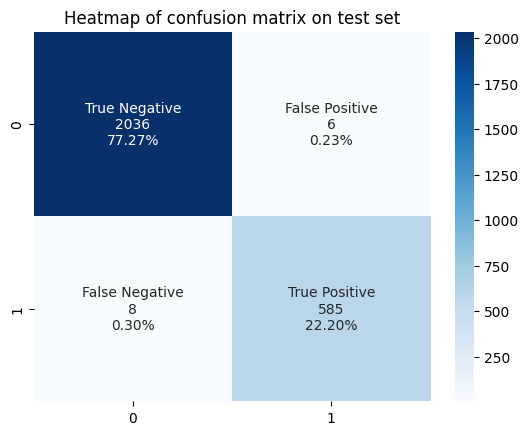



============================== Confusion Matrix on train set ==============================


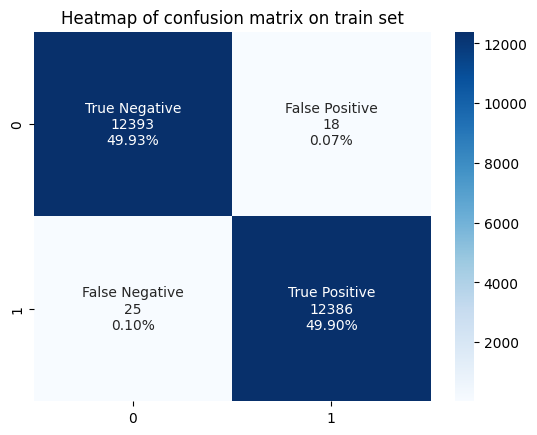



======================================== Top 10 Feature Importance ========================================


<ipython-input-33-795a7f5342af>:120: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(test_fpr, test_tpr, 'b', label = 'Test AUC = %0.2f' % test_roc_auc,color='red')
<ipython-input-33-795a7f5342af>:121: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(train_fpr, train_tpr, 'b', label = 'Train AUC = %0.2f' % train_roc_auc,color='blue')


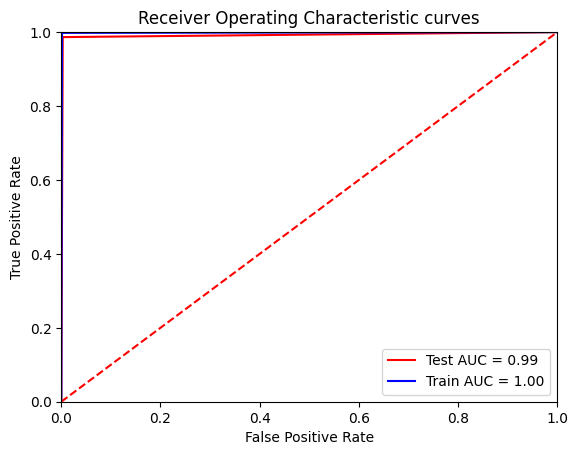

In [ ]:
# Fit and evalute model with the help of self define function
sgd_train_pred, sgd_test_pred =  matrix(sgd_grid,X_train_scaled,X_test_scaled,y_train,y_test,logistic=True)

##Decision Tree

In [ ]:
# parametrs for decision tree
d_tree_params = {
    'max_depth': [10,2, 3, 5, 10, 20],
    'min_samples_leaf': [100,5, 10, 20, 50, 100],
    'criterion': ["entropy","gini", ]
}

In [ ]:
# using grid search cv for hyperparameter tuning
dtree_grid = GridSearchCV(DecisionTreeClassifier(),param_grid=d_tree_params,cv=5,verbose=True,n_jobs=-1)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


============================== Training score ==============================


Training score  =  0.991378615744098


==================== Best Parameters and Best score ====================
best parameters  =   {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5}
Best score  =   0.9769572908830793


============================== Metrices scores on Train and Test Set ==============================
Train Accuracy score =  0.991378615744098
Test Accuracy score =  0.9707779886148008
Train Precision score =  0.9908249496981891
Test Precision score =  0.9328859060402684
Train Recall score =  0.9919426315365402
Test Recall score =  0.9376053962900506
Train F1 score =  0.9913834755999356
Test F1 score =  0.9352396972245585
Train ROC_AUC score =  0.991378615744098
Test ROC_AUC score =  0.9590083788502163


============================== Metrices scores on Train and Test Set ==============================
             

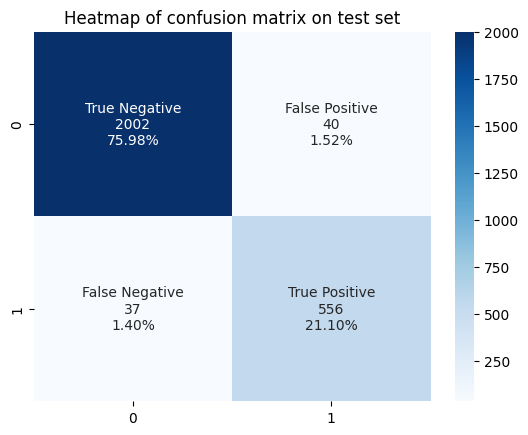



============================== Confusion Matrix on train set ==============================


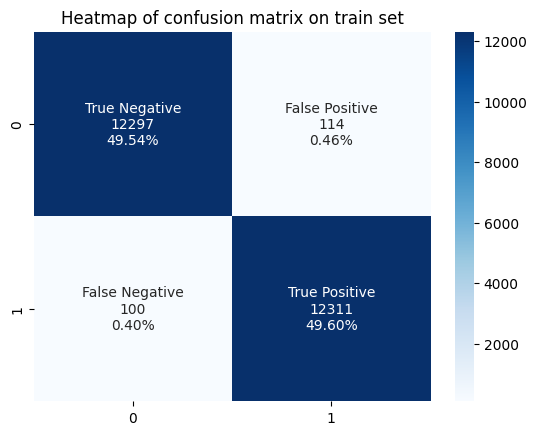



======================================== Top 10 Feature Importance ========================================


<ipython-input-33-795a7f5342af>:120: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(test_fpr, test_tpr, 'b', label = 'Test AUC = %0.2f' % test_roc_auc,color='red')
<ipython-input-33-795a7f5342af>:121: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(train_fpr, train_tpr, 'b', label = 'Train AUC = %0.2f' % train_roc_auc,color='blue')


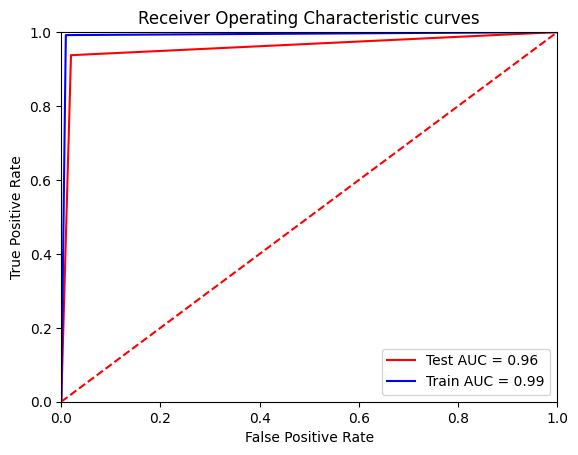

In [ ]:
# Fit and evalute model with the help of self define function
dstree_train_pred, dstree_test_pred = matrix(dtree_grid,X_train_scaled,X_test_scaled,y_train,y_test)

##Random Forest

In [ ]:
# parameter for Random Forest
rf_params = {'n_estimators':[200,100,300,250],
             'criterion':['gini','entropy'],
              'min_samples_leaf':[30,5,6,10],
              'max_depth' : [50,20,30,70],
              'min_samples_split': [10,15,20,30],
              'max_features':['sqrt']
              }


In [ ]:
# using grid search cv for hyperparameter tuning
rf_grid = GridSearchCV(RandomForestClassifier(),rf_params,cv=5,scoring='f1',verbose=True,n_jobs=-1)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


============================== Training score ==============================


Training score  =  0.9925991472930576


==================== Best Parameters and Best score ====================
best parameters  =   {'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 300}
Best score  =   0.9808653711089749


============================== Metrices scores on Train and Test Set ==============================
Train Accuracy score =  0.992587221013617
Test Accuracy score =  0.9753320683111955
Train Precision score =  0.9910047385752149
Test Precision score =  0.9536082474226805
Train Recall score =  0.994198694706309
Test Recall score =  0.9359190556492412
Train F1 score =  0.9925991472930576
Test F1 score =  0.9446808510638299
Train ROC_AUC score =  0.992587221013617
Test ROC_AUC score =  0.9613483623006245


============================== Metrices scor

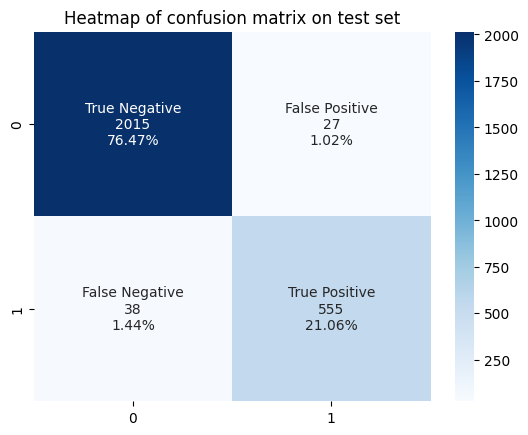



============================== Confusion Matrix on train set ==============================


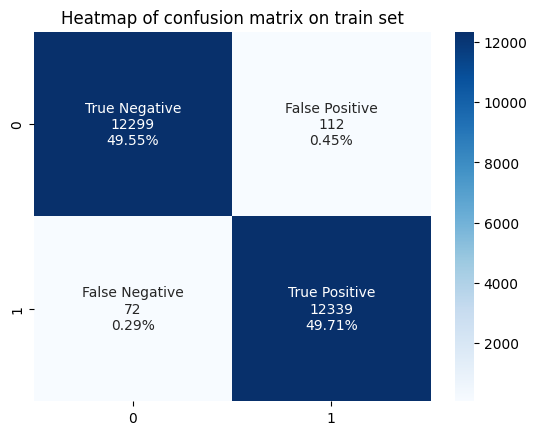



======================================== Top 10 Feature Importance ========================================


<ipython-input-33-795a7f5342af>:120: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(test_fpr, test_tpr, 'b', label = 'Test AUC = %0.2f' % test_roc_auc,color='red')
<ipython-input-33-795a7f5342af>:121: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(train_fpr, train_tpr, 'b', label = 'Train AUC = %0.2f' % train_roc_auc,color='blue')


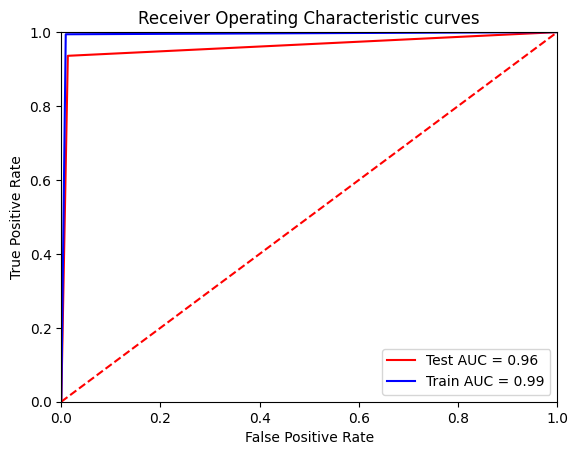

In [ ]:
# Fit and evalute model with the help of self define function
rf_train_pred, rf_test_pred = matrix(rf_grid,X_train_scaled,X_test_scaled,y_train,y_test)

##Gradient Boosting

In [ ]:
# parameter for Gradient Boosting
gb_params = {
    'max_depth': [17,10,15,20,25],
    'n_estimators': [300,50,100,200,400,],
    'learning_rate': [0.005,0.001,0.01,0.1,1.0],
    'min_samples_leaf':[20,15,20,25],
    'min_samples_split':[65,50,55,60,70],
  }


In [ ]:
# using grid search cv for hyperparameter tuning
gb_grid = GridSearchCV(GradientBoostingClassifier(),gb_params,cv=2,scoring='f1',verbose=4,n_jobs=-1)

In [ ]:
# Fit and evalute model with the help of self define function
gb_train_pred, gb_test_pred =matrix(gb_grid,X_train_scaled,X_test_scaled,y_train,y_test)

Fitting 2 folds for each of 2500 candidates, totalling 5000 fits


**RESULT**

Logistic regression performing well without hyperparameter tunning as well as after hypertunning.but after hyperparameter tunning our accuracy level increases.